# Predicting Future Sales
The data set we have available with us has been extracted from a competition of Kaggle. It is a Time Series data and we will be using it to forecast the data points of some future time period. The derived information can then be used to make better decisions accordingly.

We first import the required packages, 'Pandas' and 'Numpy'. We then load our data set.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
Sales_Train = pd.read_csv('C:/Users/salil/Desktop/AllDocuments/AnalyticsEdgeFolder/KaggleTimeSeries/sales_train.csv', index_col=[2])

We try to examine our data set in order to get an idea about the features and the observations.

In [3]:
pd.concat([Sales_Train.head(), Sales_Train.tail()], axis=0)

,date,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
59,02.01.2013,0,22154,999.00,1.0
25,03.01.2013,0,2552,899.00,1.0
25,05.01.2013,0,2552,899.00,-1.0
25,06.01.2013,0,2554,1709.05,1.0
25,15.01.2013,0,2555,1099.00,1.0
25,10.10.2015,33,7409,299.00,1.0
25,09.10.2015,33,7460,299.00,1.0
25,14.10.2015,33,7459,349.00,1.0
25,22.10.2015,33,7440,299.00,1.0


In [4]:
Total_Rows = Sales_Train.count
print (Total_Rows)

<bound method DataFrame.count of                date  date_block_num  item_id  item_price  item_cnt_day
shop_id                                                               
59       02.01.2013               0    22154      999.00           1.0
25       03.01.2013               0     2552      899.00           1.0
25       05.01.2013               0     2552      899.00          -1.0
25       06.01.2013               0     2554     1709.05           1.0
25       15.01.2013               0     2555     1099.00           1.0
...             ...             ...      ...         ...           ...
25       10.10.2015              33     7409      299.00           1.0
25       09.10.2015              33     7460      299.00           1.0
25       14.10.2015              33     7459      349.00           1.0
25       22.10.2015              33     7440      299.00           1.0
25       03.10.2015              33     7460      299.00           1.0

[2935849 rows x 5 columns]>


We create a different data set to perform our tasks and the originally loaded data set is kept untouched.

In [5]:
Sales_Train1 = Sales_Train

In [6]:
Sales_Train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 59 to 25
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   item_id         int64  
 3   item_price      float64
 4   item_cnt_day    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 134.4+ MB


In [7]:
type(Sales_Train1.date)

pandas.core.series.Series

The 'date' column that is the daily time stamps has the data type 'object' and is in the form of series. We now convert this into a 'datetime' data type so that pandas can treat it accordingly.

In [8]:
Sales_Train1['date']= pd.to_datetime(Sales_Train1['date'])

In the following step we try to change the format of the 'date' column to YYYY-MM-DD. We create a new column called 'DateNew'.

In [9]:
Sales_Train1['DateNew'] = Sales_Train1["date"].dt.strftime("%d/%m/%Y")

In [10]:
Sales_Train1['DateNew']= pd.to_datetime(Sales_Train1['DateNew'])

In [11]:
Sales_Train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 59 to 25
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   item_id         int64         
 3   item_price      float64       
 4   item_cnt_day    float64       
 5   DateNew         datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 156.8 MB


We now sort the data frame first on the basis of 'shop_id' and then on the basis of the 'DateNew' column that is chronologically. The order of the column is then changed accordingly as per convenience.

In [12]:
Sales_Train1 = Sales_Train1.sort_values(["shop_id", "DateNew"])

In [13]:
Sales_Train1 = Sales_Train1[["DateNew", "date_block_num", "item_id", "item_price", "item_cnt_day"]]

This is how the Data Frame looks currently.

In [14]:
pd.concat([Sales_Train1.head(), Sales_Train1.tail()], axis=0)

,DateNew,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
0,2013-01-03,0,10928,110.0,1.0
0,2013-01-03,0,11041,221.0,3.0
0,2013-01-03,0,11388,716.0,1.0
0,2013-01-03,0,11160,137.0,1.0
0,2013-01-03,0,8070,137.0,1.0
59,2015-10-31,33,4181,1290.0,1.0
59,2015-10-31,33,4719,999.0,1.0
59,2015-10-31,33,5065,229.0,1.0
59,2015-10-31,33,5811,98.0,1.0


We take a look at the unique values of the columns of the data set.

In [15]:
display(Sales_Train1.date_block_num.unique())
display(len(Sales_Train1.item_id.unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

21807

Further in this project, we try to predict the data points for 'shop_id' number '15'. This has been randomly chosen and similar steps can be followed to predict the required observations for any other shop. So we extract the data set for shop_id number 15 and give it an appropriate name.

In [16]:
Shop_Id_15 = Sales_Train1.loc[[15]]

This is how our newly derived data set looks like.

In [17]:
pd.concat([Shop_Id_15.head(), Shop_Id_15.tail()], axis=0)

,DateNew,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
15,2013-01-01,0,18669,199.0,1.0
15,2013-01-01,0,19929,299.5,1.0
15,2013-01-01,0,19637,399.0,1.0
15,2013-01-01,0,19080,149.0,1.0
15,2013-01-01,0,16993,399.0,1.0
15,2015-10-31,33,3352,2999.0,2.0
15,2015-10-31,33,3351,3999.0,1.0
15,2015-10-31,33,3350,2999.0,1.0
15,2015-10-31,33,1563,1199.0,1.0


We now check the unique values of all the columns of the Shop_id_15 data set.

In [18]:
display(len(Shop_Id_15.date_block_num.unique()))
display(len(Shop_Id_15.item_id.unique()))
display(len(Shop_Id_15.item_cnt_day.unique()))
display(Shop_Id_15.count())

34

8269

44

DateNew           59511
date_block_num    59511
item_id           59511
item_price        59511
item_cnt_day      59511
dtype: int64

  We now take into account the 'DateNew' and the 'item_cnt_day' column for further analysis. We will add any other column later if required.

In [19]:
Shop_Id_15_DateWiseCount = Shop_Id_15[["DateNew", "item_cnt_day"]]

Now, we do some cleaning of the data. First, remove all the rows where the values of item_cnt_day are either 0 or negative.

In [20]:
Shop_Id_15_DateWiseCountX = pd.DataFrame(Shop_Id_15_DateWiseCount[Shop_Id_15_DateWiseCount['item_cnt_day']>=1])

In the following step, we add the number of all the items sold on any particular date. 

In [21]:
Shop_Id_15_DateWiseCountX = pd.DataFrame(Shop_Id_15_DateWiseCountX.groupby(['DateNew']).sum())

Every date in the data set has these many number of observations.

In [22]:
from collections import Counter

In [23]:
Counter(Shop_Id_15_DateWiseCount.DateNew)

Counter({Timestamp('2013-01-01 00:00:00'): 107,
         Timestamp('2013-01-02 00:00:00'): 124,
         Timestamp('2013-01-03 00:00:00'): 127,
         Timestamp('2013-01-04 00:00:00'): 141,
         Timestamp('2013-01-05 00:00:00'): 113,
         Timestamp('2013-01-06 00:00:00'): 117,
         Timestamp('2013-01-07 00:00:00'): 96,
         Timestamp('2013-01-08 00:00:00'): 92,
         Timestamp('2013-01-09 00:00:00'): 63,
         Timestamp('2013-01-10 00:00:00'): 57,
         Timestamp('2013-01-11 00:00:00'): 84,
         Timestamp('2013-01-12 00:00:00'): 95,
         Timestamp('2013-01-13 00:00:00'): 69,
         Timestamp('2013-01-14 00:00:00'): 55,
         Timestamp('2013-01-15 00:00:00'): 51,
         Timestamp('2013-01-16 00:00:00'): 56,
         Timestamp('2013-01-17 00:00:00'): 66,
         Timestamp('2013-01-18 00:00:00'): 63,
         Timestamp('2013-01-19 00:00:00'): 74,
         Timestamp('2013-01-20 00:00:00'): 98,
         Timestamp('2013-01-21 00:00:00'): 42,
       

This is how the data set looks like currently.

In [24]:
pd.concat([Shop_Id_15_DateWiseCountX.head(), Shop_Id_15_DateWiseCountX.tail()], axis=0)

,item_cnt_day
DateNew,
2013-01-01,124.0
2013-01-02,159.0
2013-01-03,156.0
2013-01-04,168.0
2013-01-05,134.0
2015-10-27,34.0
2015-10-28,12.0
2015-10-29,22.0
2015-10-30,66.0


We now visualise it using a graph. First we load in the required packages.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

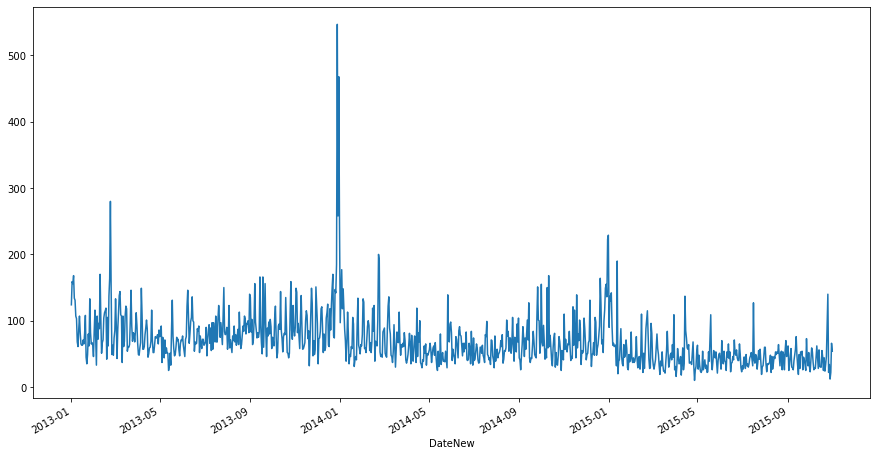

In [26]:
Shop_Id_15_DateWiseCountX['item_cnt_day'].plot(figsize=(15,8))

In [27]:
Shop_Id_15_DateWiseCountX.describe()

,item_cnt_day
count,1033.000000
mean,69.052275
std,39.470787
min,10.000000
25%,45.000000
50%,61.000000
75%,83.000000
max,547.000000


As visible from the graph, there is one sharp spike. This outlier(s) can cause some problem in our forecast. We therefore try to remove them. We first check the outliers using a boxplot.

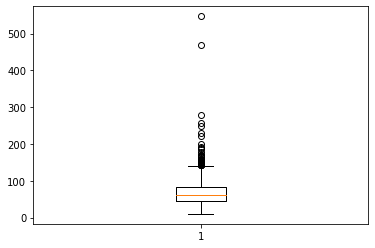

In [28]:
plt.boxplot(Shop_Id_15_DateWiseCountX['item_cnt_day']);

So there are 2 extreme values which we would like to omit and replace them with the mean of the entire data set. The value of mean was already found out using the describe() command.

In [29]:
mean = 68.92
print(mean)

68.92


In [30]:
Shop_Id_15_DateWiseCountX["item_cnt_day"] = np.where(Shop_Id_15_DateWiseCountX["item_cnt_day"] >200, mean,Shop_Id_15_DateWiseCountX['item_cnt_day'])

This is how it looks like after treatment of the outliers.

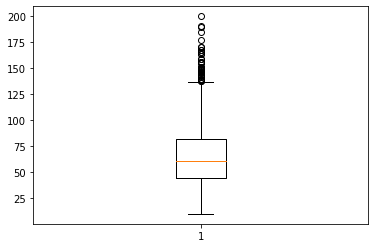

In [31]:
plt.boxplot(Shop_Id_15_DateWiseCountX['item_cnt_day']);

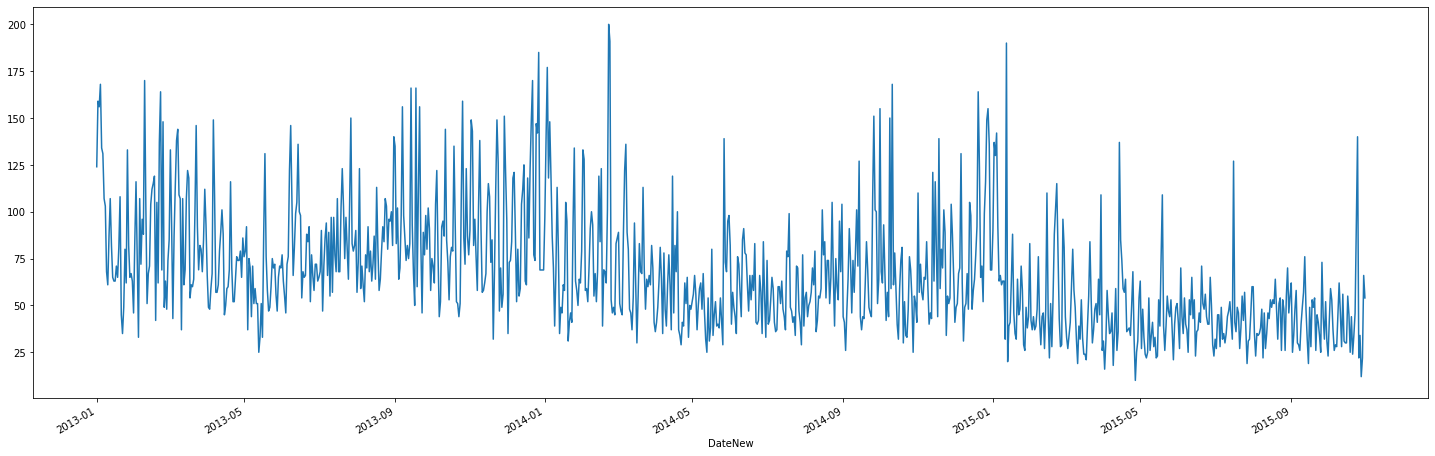

In [32]:
Shop_Id_15_DateWiseCountX['item_cnt_day'].plot(figsize=(25,8))

There are no null values in the data set as can be seen from the output of the following cell.

In [33]:
Shop_Id_15_DateWiseCountX.isnull().sum()

item_cnt_day    0
dtype: int64

The next and one of the most important step in our project is to check the stationarity of the Time Series data. We use the Augmented Dickey Fuller test for the same. We first load in the required package.

In [34]:
from statsmodels.tsa.stattools import adfuller

We now define a function to carry out the hypothesis testing. As mentioned in the following cell, the null hypothesis is that the Data set has a unit root and is non-stationary. On the other hand the alternative hypothesis is that the Data set has no unit root and is stationary. As per the general rule of hypothesis testing, we will assume the null hypothesis to be true and try to find evidence against it.

In [35]:
def adfuller_test(item_cnt_day):
    result=adfuller(item_cnt_day)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [36]:
adfuller_test(Shop_Id_15_DateWiseCountX['item_cnt_day'])

ADF Test Statistic : -2.9244568044331767
p-value : 0.042577026654841435
#Lags Used : 21
Number of Observations Used : 1011
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


The p-value is on the brim. So we can either have a lower critical value with a concise significant region or perform differencing to make the data set even more stationary.

In [37]:
Shop_Id_15_DateWiseCountX['FirstDiff'] = Shop_Id_15_DateWiseCountX['item_cnt_day'] - Shop_Id_15_DateWiseCountX['item_cnt_day'].shift(1)

In [38]:
Shop_Id_15_DateWiseCountX

,item_cnt_day,FirstDiff
DateNew,,
2013-01-01,124.0,NaN
2013-01-02,159.0,35.0
2013-01-03,156.0,-3.0
2013-01-04,168.0,12.0
2013-01-05,134.0,-34.0
...,...,...
2015-10-27,34.0,12.0
2015-10-28,12.0,-22.0
2015-10-29,22.0,10.0


In [39]:
adfuller_test(Shop_Id_15_DateWiseCountX['FirstDiff'].dropna())

ADF Test Statistic : -9.90314335749528
p-value : 3.3167464459037074e-17
#Lags Used : 20
Number of Observations Used : 1011
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


We have therefore received a satisfactory p-value. We plot the column and try to visually interpret the stationarity.

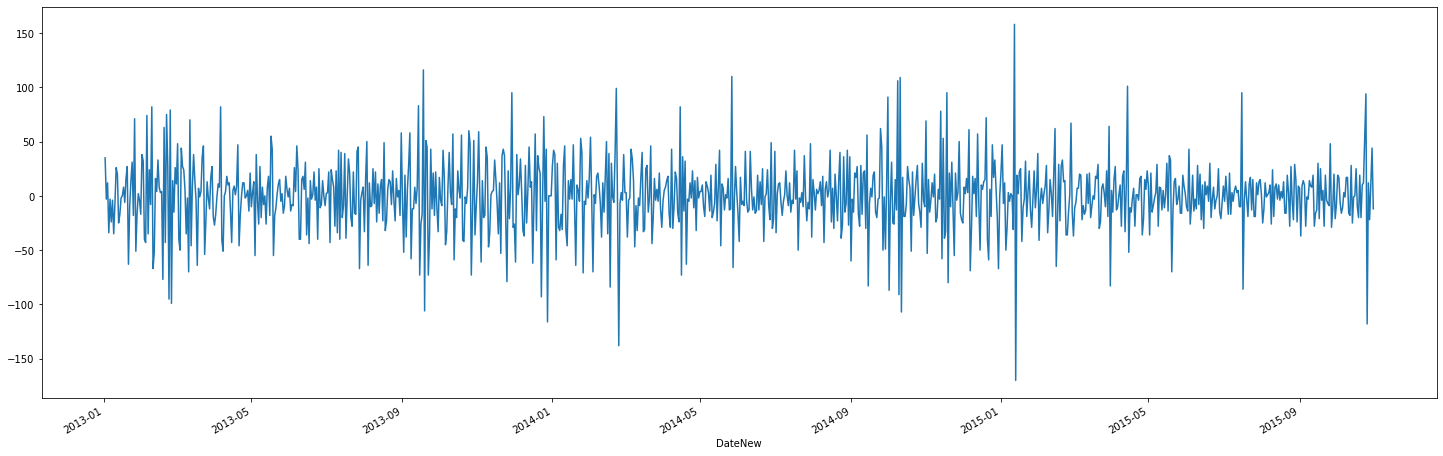

In [39]:
Shop_Id_15_DateWiseCountX['FirstDiff'].plot(figsize=(25,8))

To get an idea of the trend, we smooth the series with the help of moving average.

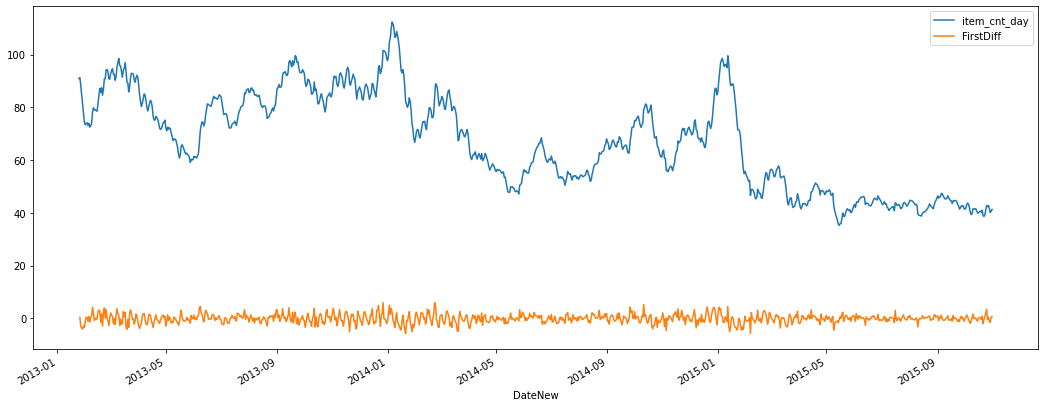

In [40]:
Shop_Id_15_DateWiseCountX_MA = Shop_Id_15_DateWiseCountX.rolling(window = 25).mean().plot(figsize=(18,7))

WE CREATE A BASELINE MODEL. Any other model which will be created further should be better than this. In this model we create a column in which the value of every subsequent observation is equal to the value in the previous time stamp. 

In [41]:
Baseline1 = pd.concat([Shop_Id_15_DateWiseCountX, Shop_Id_15_DateWiseCountX['item_cnt_day'].shift(1)], axis=1)
Baseline1.columns = ["Actual_item_cnt", "FirstDiff", "Forecasted_item_cnt"]
Baseline1 = Baseline1[["Actual_item_cnt", "Forecasted_item_cnt", "FirstDiff"]]

After rearranging the columns, the data set looks something like this.

In [42]:
Baseline1

,Actual_item_cnt,Forecasted_item_cnt,FirstDiff
DateNew,,,
2013-01-01,124.0,NaN,NaN
2013-01-02,159.0,124.0,35.0
2013-01-03,156.0,159.0,-3.0
2013-01-04,168.0,156.0,12.0
2013-01-05,134.0,168.0,-34.0
...,...,...,...
2015-10-27,34.0,22.0,12.0
2015-10-28,12.0,34.0,-22.0
2015-10-29,22.0,12.0,10.0


As the first element of the second column and third column is a NaN value, so we will remove the first row of the data frame.

In [43]:
Baseline1 = Baseline1[1:]
Baseline1

,Actual_item_cnt,Forecasted_item_cnt,FirstDiff
DateNew,,,
2013-01-02,159.0,124.0,35.0
2013-01-03,156.0,159.0,-3.0
2013-01-04,168.0,156.0,12.0
2013-01-05,134.0,168.0,-34.0
2013-01-06,131.0,134.0,-3.0
...,...,...,...
2015-10-27,34.0,22.0,12.0
2015-10-28,12.0,34.0,-22.0
2015-10-29,22.0,12.0,10.0


We load in the necessary packages to check the error of the naive model created.

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
Baseline1MSE = mean_squared_error(Baseline1.Actual_item_cnt, Baseline1.Forecasted_item_cnt)
np.sqrt(Baseline1MSE)

32.047641957541266

#### The Root Mean Square Error of any other model should be lower than that of Baseline Model 1. The first model which we try building above the baseline model is the ARIMA model. We will be trying to check the error values of different orders.

    Auto Regressive(p) Integrated(d) Moving Average(q) (ARIMA model)

We need to figure the values of p,d and q. This means we have to identify the best possible values of the Auto Regressive lag, the Differencing lag and the Moving Average lag. Identification of the AR lag value is best done with the Partial Auto Correlation plot and that of the MA lag value is best done with the Auto Correlation plot.

We first load the required packages.

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

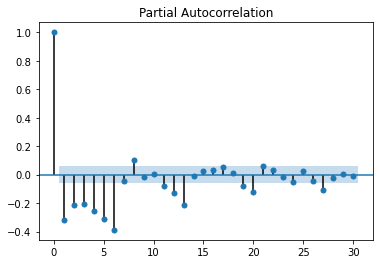

In [47]:
plot_pacf(Shop_Id_15_DateWiseCountX['FirstDiff'].iloc[1:], lags=30);

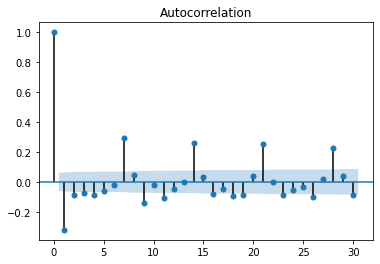

In [48]:
plot_acf(Shop_Id_15_DateWiseCountX['FirstDiff'].iloc[1:], lags=30);

Instead of using the trial and error method, one option which python provides us with is the 'pmdarima' package that is the pyramid ARIMA package. In this we can perform a grid search of the various combinations of the lag values or the order.

In [605]:
#pip install pmdarima

In [49]:
from pmdarima import auto_arima

In [50]:
ARIMA_fit1 = auto_arima(Shop_Id_15_DateWiseCountX['FirstDiff'].dropna(), start_p=1, start_q=1,
                          max_p=6, max_q=3,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)   

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9683.394, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10087.039, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9976.643, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9753.426, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9682.304, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9930.193, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9670.345, Time=0.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9887.322, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9646.410, Time=0.82 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9819.844, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=9616.135, Time=0.77 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9715.528, Time=0.29 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=9552.438, Time=1.31 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=9551.271, Time=0.65 sec
 ARIMA(6,0,0)(0,0,0)[0] intercep

We do a split of the data set into Training set and Test set.

In [51]:
Shop_Id_15_DateWiseCountXTrain = Shop_Id_15_DateWiseCountX[1:933]
Shop_Id_15_DateWiseCountXTest = Shop_Id_15_DateWiseCountX[933:1033]
display(Shop_Id_15_DateWiseCountXTrain.head())
display(Shop_Id_15_DateWiseCountXTest.head())

,item_cnt_day,FirstDiff
DateNew,,
2013-01-02,159.0,35.0
2013-01-03,156.0,-3.0
2013-01-04,168.0,12.0
2013-01-05,134.0,-34.0
2013-01-06,131.0,-3.0


,item_cnt_day,FirstDiff
DateNew,,
2015-07-23,55.0,17.0
2015-07-24,42.0,-13.0
2015-07-25,57.0,15.0
2015-07-26,38.0,-19.0
2015-07-27,19.0,-19.0


We now load in the ARIMA package to create the model and fit it.

In [54]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")

In [61]:
ModelARIMAxyz = ARIMA(Shop_Id_15_DateWiseCountXTrain['item_cnt_day'], order=(6,1,6))
ModelARIMAxyz_fit = ModelARIMAxyz.fit()
ModelARIMAxyz_fit.aic

8553.658792628681

In [62]:
ModelARIMAxyz_forecast = ModelARIMAxyz_fit.forecast(steps = 100)[0]
ModelARIMAxyz_forecastMSE = mean_squared_error(Shop_Id_15_DateWiseCountXTest['item_cnt_day'], ModelARIMAxyz_forecast)
np.sqrt(ModelARIMAxyz_forecastMSE)

15.755437548524892

So, out of all the combination of orders tested, this is the best ARIMA model we could build with the least AIC value and the manageable Root Mean Square Error value.

In the final step, we try to plot a graph of the actual values which were present in the test set and the values which we forecasted using the model that we built.

In [63]:
ModelARIMAxyz_forecastdf = pd.DataFrame(ModelARIMAxyz_forecast)
ModelARIMAxyz_forecastdf.index = Shop_Id_15_DateWiseCountXTest.index
ForecastGraph_ShopID_15 = pd.concat([Shop_Id_15_DateWiseCountXTest['item_cnt_day'], ModelARIMAxyz_forecastdf], axis=1)
ForecastGraph_ShopID_15.columns = ["item_cnt_day", "fit_values"]
ForecastGraph_ShopID_15['fit_values'] = ForecastGraph_ShopID_15['fit_values'].round(decimals=2)
ForecastGraph_ShopID_15

,item_cnt_day,fit_values
DateNew,,
2015-07-23,55.0,39.99
2015-07-24,42.0,52.00
2015-07-25,57.0,51.93
2015-07-26,38.0,40.59
2015-07-27,19.0,40.13
...,...,...
2015-10-27,34.0,33.58
2015-10-28,12.0,37.34
2015-10-29,22.0,31.10


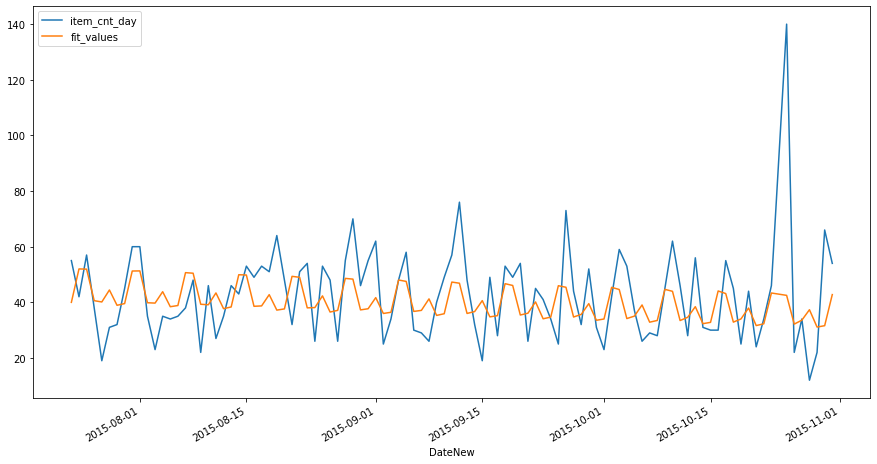

In [64]:
ForecastGraph_ShopID_15.plot(figsize=(15,8))

In the previous section, we had worked with daily data. In the following section, we will work with monthly data and use the column 'date_block_num'.

In [65]:
Shop_Id_15_MonthlyCount = Shop_Id_15[["date_block_num", "item_cnt_day"]]

Now, we do some cleaning of the data. First, remove all the rows where the values of item_cnt_day are either 0 or negative.

In [66]:
Shop_Id_15_MonthlyCountX = pd.DataFrame(Shop_Id_15_MonthlyCount[Shop_Id_15_MonthlyCount['item_cnt_day']>=1])

In the following step, we add the number of all the items sold on any particular date. 

In [67]:
Shop_Id_15_MonthlyCountX = pd.DataFrame(Shop_Id_15_MonthlyCountX.groupby(['date_block_num']).sum())
Shop_Id_15_MonthlyCountX.columns = ["Count"]
Shop_Id_15_MonthlyCountX.head()

,Count
date_block_num,
0,2730.0
1,2756.0
2,2840.0
3,2169.0
4,1933.0


This is how our data set looks currently.

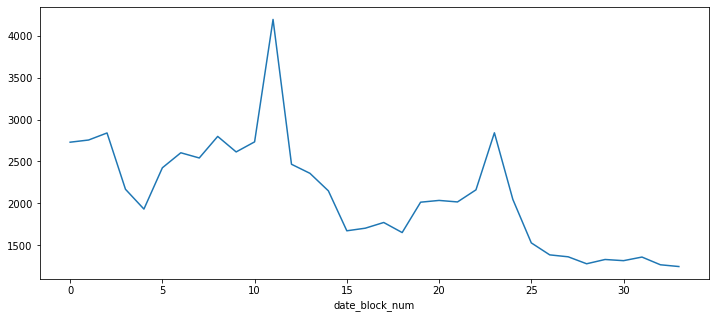

In [68]:
Shop_Id_15_MonthlyCountX['Count'].plot(figsize=(12,5))

Next, we check the stationarity of the Time Series data.

In [69]:
adfuller_test(Shop_Id_15_MonthlyCountX['Count'])

ADF Test Statistic : -2.1862502947604945
p-value : 0.21127359994273642
#Lags Used : 0
Number of Observations Used : 33
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


We, therefore try to make it stationary.

First we try to check if there exists asny seasonality as from the graph it is visible that some seasonality might be present.

We therefore use the seasonal decompose function to separate the trend and seasonal component.

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

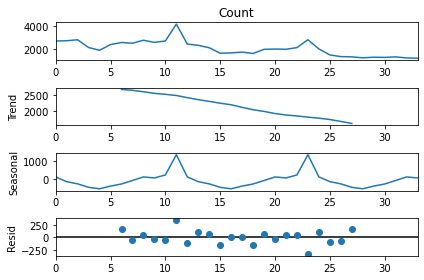

In [204]:
SeasonalDecompose = seasonal_decompose(Shop_Id_15_MonthlyCountX['Count'], model='add', period = 12)
SeasonalDecompose.plot();

We now do the differencing to make the data stationary.

In [71]:
Shop_Id_15_MonthlyCountX['FirstDiff'] = Shop_Id_15_MonthlyCountX['Count'] - Shop_Id_15_MonthlyCountX['Count'].shift(1)
Shop_Id_15_MonthlyCountX.head()

,Count,FirstDiff
date_block_num,,
0,2730.0,NaN
1,2756.0,26.0
2,2840.0,84.0
3,2169.0,-671.0
4,1933.0,-236.0


In [72]:
Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'] = Shop_Id_15_MonthlyCountX['Count'] - Shop_Id_15_MonthlyCountX['Count'].shift(12)
Shop_Id_15_MonthlyCountX.head(15)

,Count,FirstDiff,SeasonalFirstDiff
date_block_num,,,
0,2730.0,NaN,NaN
1,2756.0,26.0,NaN
2,2840.0,84.0,NaN
3,2169.0,-671.0,NaN
4,1933.0,-236.0,NaN
5,2425.0,492.0,NaN
6,2604.0,179.0,NaN
7,2542.0,-62.0,NaN
8,2799.0,257.0,NaN


Again we perform the adf test to check the stationarity.

In [73]:
adfuller_test(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].dropna())

ADF Test Statistic : -4.5730798026511765
p-value : 0.00014476008375268628
#Lags Used : 0
Number of Observations Used : 21
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


We check the graph again.

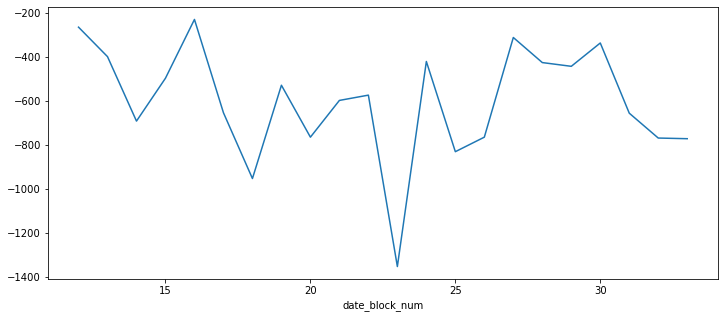

In [74]:
Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].plot(figsize=(12,5))

As our data has seasonality, we will use a SARIMA model to forecast our data.

First we try to determine the order of the model.

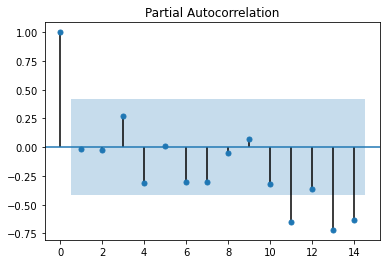

In [75]:
plot_pacf(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].iloc[12:]);

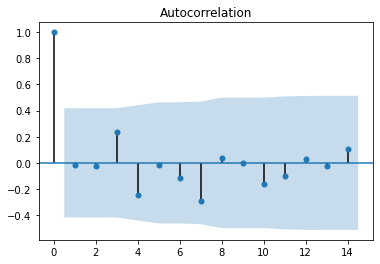

In [76]:
plot_acf(Shop_Id_15_MonthlyCountX['SeasonalFirstDiff'].iloc[12:]);

So the value of p and q is 1. The value of d will be equal to 1 as well as differencing was done only once. 

We now import the required package and build the SARIMA model to forecast the values.

In [77]:
import statsmodels.api as sm

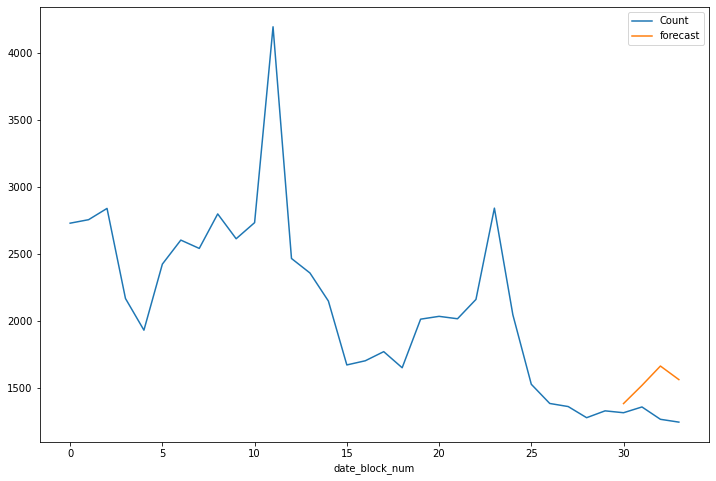

In [78]:
model=sm.tsa.statespace.SARIMAX(Shop_Id_15_MonthlyCountX['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
Shop_Id_15_MonthlyCountX['forecast']=results.predict(start=30,end=34,dynamic=True)
Shop_Id_15_MonthlyCountX[['Count','forecast']].plot(figsize=(12,8))